# Bolivian Football League Betting Odds
## 3. Model Creation

The purpose of this notebook is to create a base model to benchmark other algorithms against, and then trying out different classifiers on the dataframe previously engineered.

In [225]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
import string
import matplotlib.ticker as ticker
import re
import sklearn
style.use('fivethirtyeight')

# Importing SKLEARN packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# load dataset
odds = pd.read_csv('/Users/miketondu/Dropbox/Data Science/Sharpest Minds/odds_data/bolivian_football_odds_prepared.csv',
                  parse_dates= ['date'])

# Dropping columns which are no longer useful for modelling purposes
#odds.drop_duplicates('match_href').head(1000)

odds.drop([ 'home_odds', 'draw_odds',
            'away_odds','final_result',
            'away_win', 'home_loss', 'away_loss', 
            'home_points', 'away_points',
            'home_goals', 'away_goals',
            'first_half_home', 'first_half_away',
            'second_half_home','second_half_away',
            'home_games_played', 'away_games_played',
            'home_goals_allowed',
            'away_goals_allowed', 'total_goals', 'total_first_half',
            'total_second_half','home_win_first_h', 'away_win_first_h', 'home_win_second_h',
            'away_win_second_h',
            'cumulative_home_win', 'cumulative_away_win',
            'cumulative_home_loss', 'cumulative_away_loss','cumulative_home_points',
            'cumulative_away_points','cumulative_home_games_played',
            'cumulative_away_games_played','cumulative_home_goals_allowed', 'cumulative_away_goals_allowed',
            'cumulative_home_win_first_h',
            'cumulative_away_win_first_h', 'cumulative_home_win_second_h',
            'cumulative_away_win_second_h', 'cumulative_home_goals',
            'cumulative_away_goals',]
          ,axis=1,inplace=True)


odds.columns
odds.shape
#odds.info()
odds_unique = odds.drop_duplicates('match_href')

Index(['match', 'match_href', 'bookmakers', 'payout', 'date', 'time',
       'season_year', 'home_team', 'away_team', 'implied_home_odds',
       'implied_draw_odds', 'implied_away_odds', 'over', 'win_home_or_away',
       'winner', 'home_win', 'upset', 'altitude', 'tropics',
       'season_win_home_team', 'season_win_away_team', 'season_loss_home_team',
       'season_loss_away_team', 'season_points_home_team',
       'season_points_away_team', 'season_games_played_home_team',
       'season_games_played_away_team', 'season_goals_home_team',
       'season_goals_away_team', 'season_goals_allowed_home_team',
       'season_goals_allowed_away_team', 'season_win_first_h_home_team',
       'season_win_first_h_away_team', 'season_win_second_h_home_team',
       'season_win_second_h_away_team'],
      dtype='object')

(20776, 35)

In [213]:
odds = odds.loc[:,[ 'implied_home_odds', 'implied_draw_odds', 
                    'implied_away_odds','season_year',
                    'home_team','away_team',
                    'home_win',               
                    #'over',                    
                    'altitude','tropics',
                    'season_win_home_team', 'season_win_away_team', 
                    'season_loss_home_team', 'season_loss_away_team', 
                    'season_points_home_team','season_points_away_team', 
                    'season_games_played_home_team','season_games_played_away_team',
                    'season_goals_home_team','season_goals_away_team',
                    'season_goals_allowed_home_team', 'season_goals_allowed_away_team',
                    'season_win_first_h_home_team', 'season_win_first_h_away_team',
                    'season_win_second_h_home_team', 'season_win_second_h_away_team']]
odds.shape



(20776, 25)

In [226]:
odds_unique = odds_unique.loc[:,[ 'implied_home_odds', 'implied_draw_odds', 
                    'implied_away_odds','season_year',
                    'home_team','away_team',
                    'home_win',               
                    #'over',                    
                    'altitude','tropics',
                    'season_win_home_team', 'season_win_away_team', 
                    'season_loss_home_team', 'season_loss_away_team', 
                    'season_points_home_team','season_points_away_team', 
                    'season_games_played_home_team','season_games_played_away_team',
                    'season_goals_home_team','season_goals_away_team',
                    'season_goals_allowed_home_team', 'season_goals_allowed_away_team',
                    'season_win_first_h_home_team', 'season_win_first_h_away_team',
                    'season_win_second_h_home_team', 'season_win_second_h_away_team']]
odds_unique.shape



(2840, 25)

In [214]:
odds.head()

,implied_home_odds,implied_draw_odds,implied_away_odds,season_year,home_team,away_team,home_win,altitude,tropics,season_win_home_team,season_win_away_team,season_loss_home_team,season_loss_away_team,season_points_home_team,season_points_away_team,season_games_played_home_team,season_games_played_away_team,season_goals_home_team,season_goals_away_team,season_goals_allowed_home_team,season_goals_allowed_away_team,season_win_first_h_home_team,season_win_first_h_away_team,season_win_second_h_home_team,season_win_second_h_away_team
0,0.606,0.274,0.233,2008,La Paz,Blooming,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.532,0.299,0.282,2008,Real Potosi,Aurora,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.606,0.286,0.253,2008,La Paz,Blooming,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.541,0.308,0.294,2008,Real Potosi,Aurora,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.667,0.290,0.185,2008,Blooming,La Paz,1,0,0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0


### Base Model
For the purpose of having a base model to compare all other iterations of our model against, we will create a one which will predict a home team win 100% of the time.

In [227]:
# model_df
model_df = odds.copy()
target_var = 'home_win'

# Creating X and Y
X = np.ones(len(odds)).reshape(-1, 1)
y = model_df[target_var]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Score on test set
print('Accuracy of base model predicting only home wins: ', dt.score(X_test, y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy of base model predicting only home wins:  0.5542934154793993


### Modelling

In [229]:
# Preparing dataframe to feed it into the model
target_var = 'home_win'

model_df = odds_unique.copy().dropna()
X = model_df.loc[:,odds_unique.columns!=target_var] 
X = pd.get_dummies(X)
y = model_df.loc[:,target_var]

X.shape
y.shape

(2840, 62)

(2840,)

In [238]:
# Random forest
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=5)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

# Prediction on test set
y_pred=rf.predict(X_test)
rf.score(X_test,y_test)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

0.06441241375590678

In [239]:
# SVM 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Instantiate model 
clf = SVC()

# Train the model on training data
clf.fit(X_train, y_train)

# Prediction on test set
y_pred=clf.predict(X_test)
clf.score(X_test,y_test)


/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

0.5492957746478874

In [246]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)


# Models

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFR', RandomForestRegressor()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# Choose model
clf = models[0][1]

# Train the model on training data
clf.fit(X_train, y_train)

# Prediction on test set
y_pred=clf.predict(X_test)

clf.score(X_test,y_test)



/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.6467136150234741

/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

LR: 0.649648 (0.014259)
LDA: 0.640845 (0.010622)


/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.557394 (0.020184)
CART: 0.556690 (0.041921)
NB: 0.614437 (0.036745)


/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/si

SVM: 0.557394 (0.014372)


Text(0.5,0.98,'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a473e8208>,
 'caps': [<matplotlib.lines.Line2D at 0x1a473e8ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a473e8080>,
 'medians': [<matplotlib.lines.Line2D at 0x1a4740a3c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a4740a828>,
 'means': []}

[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'KNN'),
 Text(0,0,'CART'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

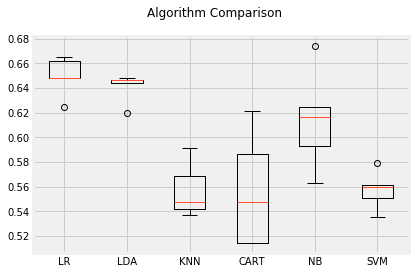

In [247]:
# Compare Algorithms
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('RFR', RandomForestRegressor()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()